# Core Mission
## 1. 캐릭터 능력 수치의 합이 가장 큰 캐릭터는?

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv('./charcters_stats.csv')
df.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [3]:
df.describe()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,44.502455,29.083470,27.306056,41.839607,40.312602,43.206219,226.250409
std,32.924722,32.610939,25.760173,36.543849,34.539910,33.270329,167.324034
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
50%,50.000000,10.000000,23.000000,32.000000,37.000000,50.000000,255.000000
75%,75.000000,53.000000,42.000000,80.000000,67.000000,70.000000,351.500000
max,113.000000,100.000000,100.000000,120.000000,100.000000,101.000000,581.000000


In [4]:
df.corr()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Intelligence,1.000000,0.565508,0.619845,0.683933,0.720550,0.783679,0.856352
Strength,0.565508,1.000000,0.640657,0.793649,0.639829,0.575045,0.824557
Speed,0.619845,0.640657,1.000000,0.704255,0.683467,0.594568,0.813902
Durability,0.683933,0.793649,0.704255,1.000000,0.756840,0.679583,0.907441
Power,0.720550,0.639829,0.683467,0.756840,1.000000,0.653452,0.873359
Combat,0.783679,0.575045,0.594568,0.679583,0.653452,1.000000,0.839966
Total,0.856352,0.824557,0.813902,0.907441,0.873359,0.839966,1.000000


In [5]:
df.isnull().sum()

Name            0
Alignment       3
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Total           0
dtype: int64

### Total이 수치의 합을 나타내므로 total값이 최대치인 행의 Name

In [16]:
df[df['Total']==df['Total'].max()].Name

361    Martian Manhunter
Name: Name, dtype: object

Matrian Manhunter(마션 맨헌터)가 수치의 합이 가장 큰 캐릭터이다. 

### 수치의 합이 높은 순서대로 top50 캐릭터 확인해보기

In [10]:
top_hero = df[['Name','Total']].sort_values(by=['Total'], axis=0, ascending=False).head(50)
top_hero

,Name,Total
361,Martian Manhunter,581
242,General Zod,579
535,Superboy-Prime,579
537,Superman,579
16,Amazo,575
525,Stardust,568
238,Galactus,553
82,Bizarro,550
203,Dormammu,546
546,Thor,546


## 2. 좋은 캐릭터와 나쁜 캐릭터들의 능력치 분포

### Intelligence

<AxesSubplot:xlabel='Alignment', ylabel='Intelligence'>

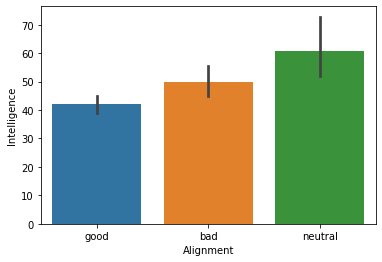

In [30]:
sns.barplot(data=df, x="Alignment", y="Intelligence")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


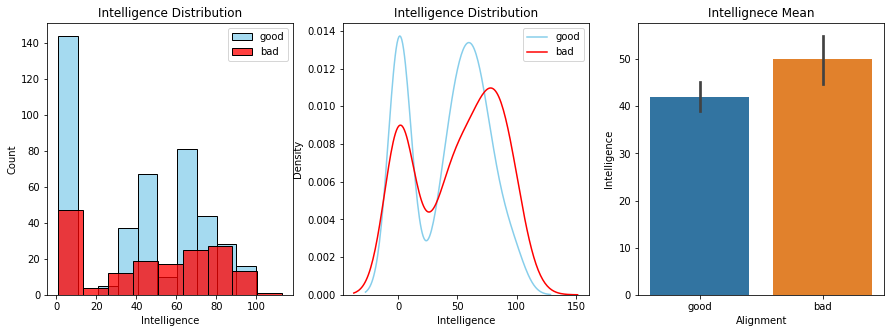

In [127]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(15, 5)

sns.histplot(df['Intelligence'][df['Alignment']=='good'], color="skyblue", label="good", ax=axes[0])
sns.histplot(df['Intelligence'][df['Alignment']=='bad'], color="red", label="bad", ax=axes[0])
axes[0].legend(['good', 'bad'])

sns.distplot(df['Intelligence'][df['Alignment']=='good'], color="skyblue", ax=axes[1], hist=False, kde=True)
sns.distplot(df['Intelligence'][df['Alignment']=='bad'], color="red", ax=axes[1], hist=False, kde=True)
axes[1].legend(['good', 'bad'])

sns.barplot(data=df[['Alignment', 'Intelligence']][(df['Alignment']=='good') | (df['Alignment']=='bad')], x="Alignment", y="Intelligence")

axes[2].set(title="Intellignece Mean")
axes[0].set(title="Intelligence Distribution")
axes[1].set(title="Intelligence Distribution")

plt.show()

### Strength

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


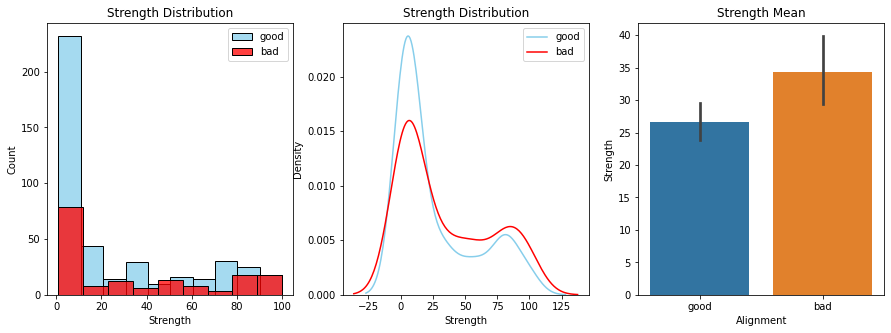

In [123]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(15, 5)

sns.histplot(df['Strength'][df['Alignment']=='good'], color="skyblue", ax=axes[0])
sns.histplot(df['Strength'][df['Alignment']=='bad'], color="red", ax=axes[0])
sns.distplot(df['Strength'][df['Alignment']=='good'], color="skyblue", ax=axes[1], hist=False, kde=True)
sns.distplot(df['Strength'][df['Alignment']=='bad'], color="red", ax=axes[1], hist=False, kde=True)
sns.barplot(data=df[['Alignment', 'Strength']][(df['Alignment']=='good') | (df['Alignment']=='bad')], x="Alignment", y="Strength")

axes[2].set(title="Strength Mean")
axes[0].set(title="Strength Distribution")
axes[1].set(title="Strength Distribution")
axes[0].legend(['good', 'bad'])
axes[1].legend(['good', 'bad'])

plt.show()

### Speed

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


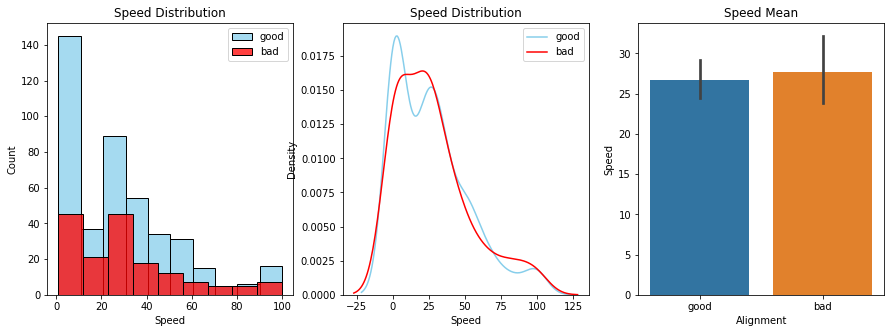

In [124]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(15, 5)

sns.histplot(df['Speed'][df['Alignment']=='good'], color="skyblue", ax=axes[0])
sns.histplot(df['Speed'][df['Alignment']=='bad'], color="red", ax=axes[0])

sns.distplot(df['Speed'][df['Alignment']=='good'], color="skyblue", ax=axes[1], hist=False, kde=True)
sns.distplot(df['Speed'][df['Alignment']=='bad'], color="red", ax=axes[1], hist=False, kde=True)

sns.barplot(data=df[['Alignment', 'Speed']][(df['Alignment']=='good') | (df['Alignment']=='bad')], x="Alignment", y="Speed", ax=axes[2])

axes[0].set(title="Speed Distribution")
axes[1].set(title="Speed Distribution")
axes[2].set(title="Speed Mean")
axes[0].legend(['good','bad'])
axes[1].legend(['good', 'bad'])

plt.show()

### Durability

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


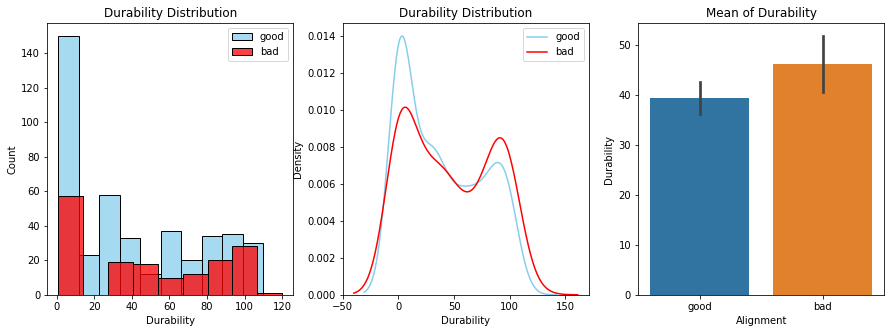

In [117]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(15, 5)

sns.histplot(df['Durability'][df['Alignment']=='good'], color="skyblue", ax=axes[0])
sns.histplot(df['Durability'][df['Alignment']=='bad'], color="red", ax=axes[0])

sns.distplot(df['Durability'][df['Alignment']=='good'], color="skyblue", ax=axes[1], hist=False, kde=True)
sns.distplot(df['Durability'][df['Alignment']=='bad'], color="red", ax=axes[1], hist=False, kde=True)

sns.barplot(data=df[['Alignment', 'Durability']][(df['Alignment']=='good') | (df['Alignment']=='bad')], x="Alignment", y="Durability")

axes[0].set(title="Durability Distribution")
axes[0].legend(['good', 'bad'])
axes[1].set(title="Durability Distribution")
axes[1].legend(['good', 'bad'])
axes[2].set(title="Mean of Durability")

plt.show()

### Power

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


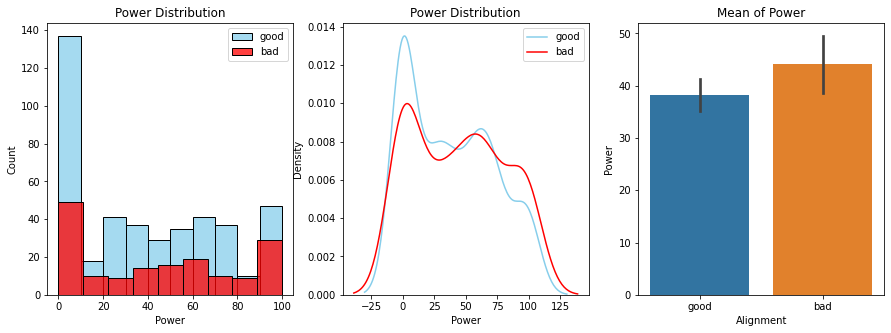

In [118]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(15, 5)

sns.barplot(data=df[['Alignment', 'Power']][(df['Alignment']=='good') | (df['Alignment']=='bad')], x="Alignment", y="Power", ax=axes[2])

sns.histplot(df['Power'][df['Alignment']=='good'], color="skyblue", label="good", ax=axes[0])
sns.histplot(df['Power'][df['Alignment']=='bad'], color="red", label="bad", ax=axes[0])

sns.distplot(df['Power'][df['Alignment']=='good'], color="skyblue", label="good", ax=axes[1], hist=False, kde=True)
sns.distplot(df['Power'][df['Alignment']=='bad'], color="red", label="bad", ax=axes[1], hist=False, kde=True)

axes[0].legend(['good', 'bad'])
axes[1].legend(['good', 'bad'])
axes[2].set(title="Mean of Power")
axes[0].set(title="Power Distribution")
axes[1].set(title="Power Distribution")

plt.show()

### Combat

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


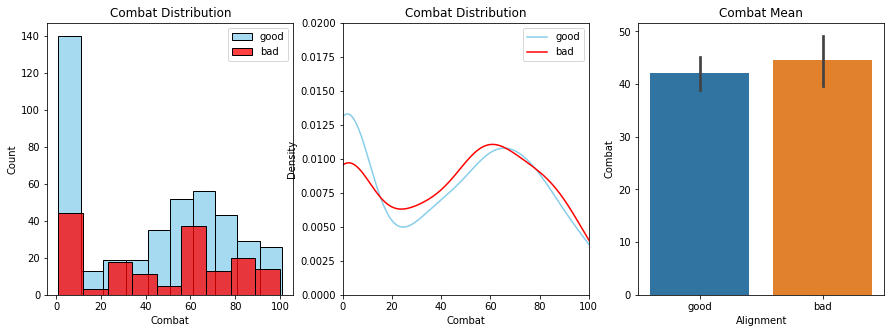

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(15, 5)

sns.distplot(df['Combat'][df['Alignment']=='good'], color="skyblue", hist=False, kde=True, ax=axes[1])
sns.distplot(df['Combat'][df['Alignment']=='bad'], color="red", hist=False, kde=True, ax=axes[1])

sns.histplot(df['Combat'][df['Alignment']=='good'], color="skyblue", ax=axes[0])
sns.histplot(df['Combat'][df['Alignment']=='bad'], color="red", ax=axes[0])

sns.barplot(data=df[['Alignment', 'Combat']][(df['Alignment']=='good') | (df['Alignment']=='bad')], x="Alignment", y="Combat")

axes[0].legend(['good', 'bad'])
axes[1].legend(['good', 'bad'])
axes[1].axis([0,100,0,0.02])
axes[0].set(title="Combat Distribution")
axes[1].set(title="Combat Distribution")
axes[2].set(title="Combat Mean")

plt.show()

=> 전체적으로 bad 진영 캐릭터들의 수치가 good진영 캐릭터들보다 높다는 것을 알 수 있다

 🤔 막대그래프보다 분포를 선으로 그리기 위해 `.distplot`을 사용했는데 분포 모양이 좀 다른거 같다...